# Movie Recommendation System
It will Load CSV data and Recommend user for movies.

In [80]:
import pandas as pd

### Data Load

In [81]:
file_path = "/content/7_Movie_Recommendation_System.csv"
movies_df = pd.read_csv(file_path)
movies_df.head()

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
0,1,The Shawshank Redemption,Drama,1994,9.3,2000000,142,Frank Darabont,NaN
1,2,The Godfather,Crime,1972,9.2,1500000,175,Francis Ford Coppola,NaN
2,3,The Dark Knight,Action,2008,9.0,2500000,152,Christopher Nolan,NaN
3,4,Schindler's List,History,1993,9.0,1200000,195,Steven Spielberg,NaN
4,5,The Lord of the Rings: The Return of the King,Adventure,2003,8.9,1700000,201,Peter Jackson,NaN


### Filter Movie

In [82]:
# Function to filter movies
def filter_movies(genre=None, year=None, director=None):
    filtered = movies_df
    if genre:
        filtered = filtered[filtered['Genre'].str.contains(genre, case=False)]
    if year:
        filtered = filtered[filtered['Release Year'] == year]
    if director:
        filtered = filtered[filtered['Director'].str.contains(director, case=False)]
    return filtered

filter_movies(genre='Drama', year=1994)

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
0,1,The Shawshank Redemption,Drama,1994,9.3,2000000,142,Frank Darabont,NaN
5,6,Forrest Gump,Drama,1994,8.8,1200000,142,Robert Zemeckis,NaN
28,29,The Shawshank Redemption,Drama,1994,9.3,2000000,142,Frank Darabont,NaN


In [83]:
filter_movies(director='nolan')

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
2,3,The Dark Knight,Action,2008,9.0,2500000,152,Christopher Nolan,NaN
6,7,Inception,Sci-Fi,2010,8.8,2100000,148,Christopher Nolan,NaN
17,18,Interstellar,Sci-Fi,2014,8.6,1600000,169,Christopher Nolan,NaN
18,19,The Prestige,Drama,2006,8.5,1300000,130,Christopher Nolan,NaN
27,28,The Dark Knight Rises,Action,2012,8.4,2100000,164,Christopher Nolan,NaN


# Task 2: Movie Search System

In [84]:
def search_movies(title=None, keyword=None):
    results = movies_df
    if title:
        results = results[results['Title'].str.contains(title, case=False)]
    if keyword:
        results = results[results['Genre'].str.contains(keyword, case=False)]
    return results

In [85]:
search_movies(title='dark')

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
2,3,The Dark Knight,Action,2008,9.0,2500000,152,Christopher Nolan,NaN
27,28,The Dark Knight Rises,Action,2012,8.4,2100000,164,Christopher Nolan,NaN


### Suggested Movie

In [86]:
def suggest_movies(genre=None, director=None, year=None):
    return filter_movies(genre=genre, director=director, year=year)

Showing Output

In [87]:
suggest_movies(genre='Sci-Fi', year = 2010)

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
6,7,Inception,Sci-Fi,2010,8.8,2100000,148,Christopher Nolan,NaN


# Task 3: User Reviews and Ratings System

In [88]:
user_ratings = {}
# Function for rating movie
def rate_movie(movie_id, rating, review=None):
    if movie_id not in movies_df['Movie ID'].values:
        print("Invalid Movie ID")
        return

    user_ratings.setdefault(movie_id, {'ratings': [], 'reviews': []})
    user_ratings[movie_id]['ratings'].append(rating)
    if review:
        user_ratings[movie_id]['reviews'].append(review)

    # Update movie's average rating
    total_votes = movies_df.loc[movies_df['Movie ID'] == movie_id, 'Number of Votes'].values[0]
    current_rating = movies_df.loc[movies_df['Movie ID'] == movie_id, 'Rating'].values[0]

    new_total = total_votes + 1
    new_rating = (current_rating * total_votes + rating) / new_total

    movies_df.loc[movies_df['Movie ID'] == movie_id, 'Number of Votes'] = new_total
    movies_df.loc[movies_df['Movie ID'] == movie_id, 'Rating'] = new_rating.round(1)

In [89]:
rate_movie(1, 4.5, "Great movie!")
rate_movie(6, 2.0, "Very Bad Movie")
rate_movie(7, 1.0, "boring Movie")
movies_df[movies_df['Movie ID'] == 6]

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
5,6,Forrest Gump,Drama,1994,8.8,1200001,142,Robert Zemeckis,NaN


# Task 4


In [90]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [91]:
# -- Personalized Recommendations --
def get_personalized_recommendations(min_rating=4.0):
    favorite_genres = defaultdict(int)

    # Analyze user's rating history
    for movie_id, data in user_ratings.items():
        avg_user_rating = sum(data['ratings'])/len(data['ratings'])
        if avg_user_rating >= min_rating:
            movie_genres = movies_df[movies_df['Movie ID'] == movie_id]['Genre'].values[0]
            favorite_genres[movie_genres] += 1

    if not favorite_genres:
        return pd.DataFrame()  # Empty if no favorites

    # Get top favorite genre
    top_genre = max(favorite_genres, key=favorite_genres.get)

    # Recommend top-rated movies in favorite genre not yet rated
    rated_movies = user_ratings.keys()
    return movies_df[
        (movies_df['Genre'] == top_genre) &
        (~movies_df['Movie ID'].isin(rated_movies))
    ].sort_values('Rating', ascending=False).head(5)

In [92]:
get_personalized_recommendations()

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
28,29,The Shawshank Redemption,Drama,1994,9.3,2000000,142,Frank Darabont,NaN
34,35,12 Angry Men,Drama,1957,8.9,700000,96,Sidney Lumet,NaN
14,15,Fight Club,Drama,1999,8.8,1100000,139,David Fincher,NaN
21,22,The Green Mile,Drama,1999,8.6,1300000,189,Frank Darabont,NaN
18,19,The Prestige,Drama,2006,8.5,1300000,130,Christopher Nolan,NaN


In [93]:
# -- Top 10 Lists --
def generate_top10(category='genre', specific_value=None):
    if category == 'genre':
        grouped = movies_df.groupby('Genre')
    elif category == 'year':
        grouped = movies_df.groupby('Release Year')
    else:  # general top 10
        return movies_df.sort_values('Rating', ascending=False).head(10)

    if specific_value:
        return movies_df[
            movies_df[category.capitalize()] == specific_value
        ].sort_values('Rating', ascending=False).head(10)

    # Return top 1 from each group
    return grouped.apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)

In [94]:
generate_top10('genre', 'Sci-Fi')

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
6,7,Inception,Sci-Fi,2010,8.8,2100001,148,Christopher Nolan,NaN
8,9,The Matrix,Sci-Fi,1999,8.7,1600000,136,Lana Wachowski,NaN
17,18,Interstellar,Sci-Fi,2014,8.6,1600000,169,Christopher Nolan,NaN
49,50,Alien,Sci-Fi,1979,8.4,1100000,117,Ridley Scott,NaN
40,41,Jurassic Park,Sci-Fi,1993,8.1,1500000,127,Steven Spielberg,NaN
39,40,The Martian,Sci-Fi,2015,8.0,1200000,144,Ridley Scott,NaN


In [95]:
generate_top10('Year', 1994)

,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
0,1,The Shawshank Redemption,Drama,1994,9.3,2000001,142,Frank Darabont,NaN
28,29,The Shawshank Redemption,Drama,1994,9.3,2000000,142,Frank Darabont,NaN
1,2,The Godfather,Crime,1972,9.2,1500000,175,Francis Ford Coppola,NaN
2,3,The Dark Knight,Action,2008,9.0,2500000,152,Christopher Nolan,NaN
3,4,Schindler's List,History,1993,9.0,1200000,195,Steven Spielberg,NaN
9,10,The Godfather: Part II,Crime,1974,9.0,1000000,202,Francis Ford Coppola,NaN
4,5,The Lord of the Rings: The Return of the King,Adventure,2003,8.9,1700000,201,Peter Jackson,NaN
34,35,12 Angry Men,Drama,1957,8.9,700000,96,Sidney Lumet,NaN
12,13,Pulp Fiction,Crime,1994,8.9,2200000,154,Quentin Tarantino,NaN
13,14,The Lord of the Rings: The Fellowship of the Ring,Adventure,2001,8.8,1800000,178,Peter Jackson,NaN


In [96]:
generate_top10()

<ipython-input-93-fcb65116960e>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return grouped.apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)


,Movie ID,Title,Genre,Release Year,Rating,Number of Votes,Duration (mins),Director,Unnamed: 8
0,3,The Dark Knight,Action,2008,9.0,2500000,152,Christopher Nolan,NaN
1,5,The Lord of the Rings: The Return of the King,Adventure,2003,8.9,1700000,201,Peter Jackson,NaN
2,16,The Lion King,Animation,1994,8.5,1000000,88,Rob Minkoff,NaN
3,25,The Intouchables,Comedy,2011,8.5,1000000,112,Olivier Nakache,NaN
4,2,The Godfather,Crime,1972,9.2,1500000,175,Francis Ford Coppola,NaN
5,1,The Shawshank Redemption,Drama,1994,9.3,2000001,142,Frank Darabont,NaN
6,4,Schindler's List,History,1993,9.0,1200000,195,Steven Spielberg,NaN
7,48,The Shining,Horror,1980,8.4,1200000,146,Stanley Kubrick,NaN
8,7,Inception,Sci-Fi,2010,8.8,2100001,148,Christopher Nolan,NaN
9,43,The Sixth Sense,Thriller,1999,8.1,1000000,107,Night Shyamalan,NaN


Visualization

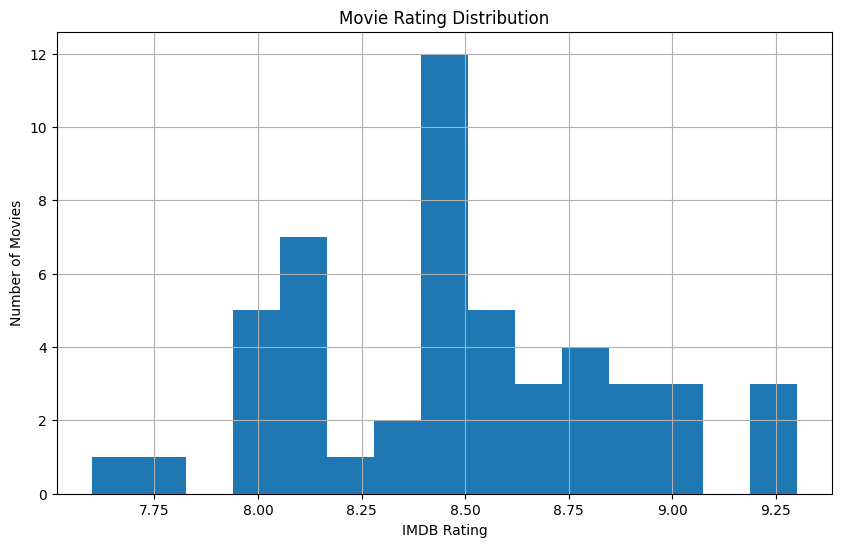

In [97]:
def plot_rating_distribution():
    plt.figure(figsize=(10, 6))
    movies_df['Rating'].hist(bins=15)
    plt.title('Movie Rating Distribution')
    plt.xlabel('IMDB Rating')
    plt.ylabel('Number of Movies')
    plt.show()

plot_rating_distribution()

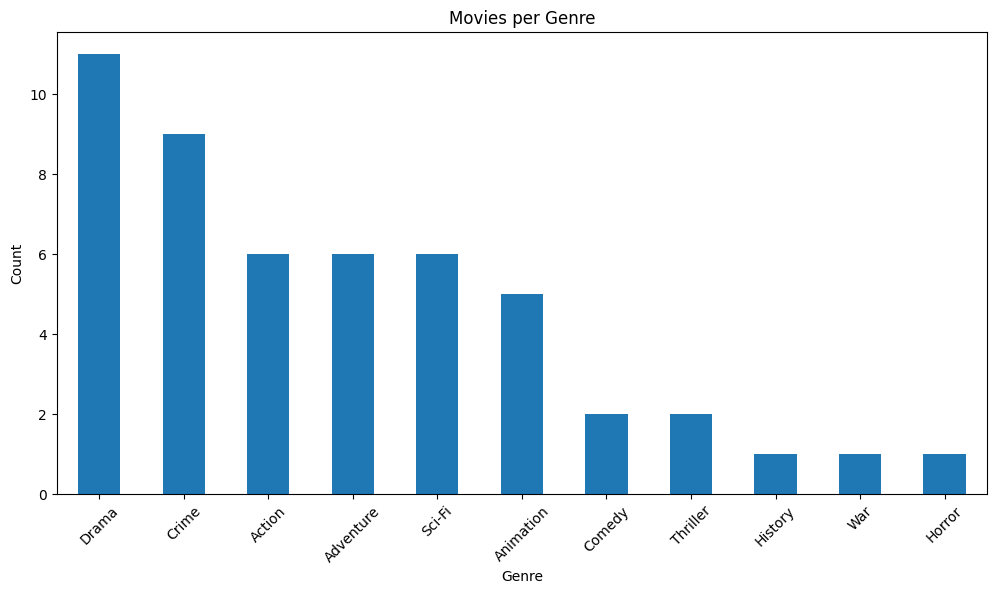

In [98]:
def plot_genre_counts():
    plt.figure(figsize=(12, 6))
    movies_df['Genre'].value_counts().plot(kind='bar')
    plt.title('Movies per Genre')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

plot_genre_counts()

# Sentiment Analysis

In [99]:
positive_words = ['great', 'awesome', 'amazing', 'love', 'best', 'excellent']
negative_words = ['bad', 'terrible', 'boring', 'worst', 'awful', 'disappointing']

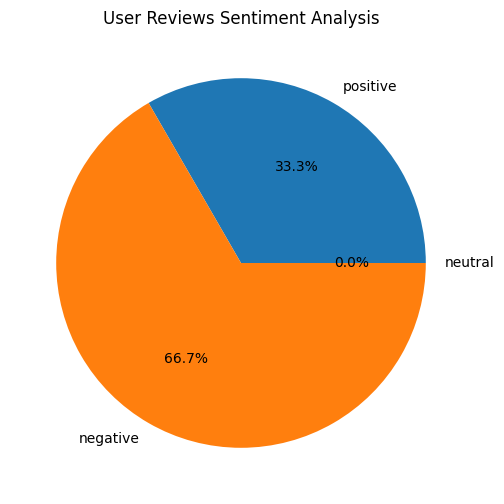

{'positive': 1, 'negative': 2, 'neutral': 0}

In [100]:
def analyze_sentiment():
    sentiment = {'positive': 0, 'negative': 0, 'neutral': 0}

    for movie_id, data in user_ratings.items():
        for review in data.get('reviews', []):
            review_lower = review.lower()
            pos_count = sum(1 for word in positive_words if word in review_lower)
            neg_count = sum(1 for word in negative_words if word in review_lower)

            if pos_count > neg_count:
                sentiment['positive'] += 1
            elif neg_count > pos_count:
                sentiment['negative'] += 1
            else:
                sentiment['neutral'] += 1

    plt.figure(figsize=(8, 6))
    plt.pie(sentiment.values(), labels=sentiment.keys(), autopct='%1.1f%%')
    plt.title('User Reviews Sentiment Analysis')
    plt.show()
    return sentiment

analyze_sentiment()

# Task 5 User Interface


=== Movie Recommendation System ===
1. Browse Movies with Filters
2. Search Movies
3. Rate a Movie
4. Get Recommendations
5. Show Top Movies
6. View Statistics
7. Analyze Review Sentiment
8. Exit
Enter your choice (1-8): 5

--- Top Movies ---
1. Top 10 Overall
2. Top by Genre
3. Top by Year
Enter choice (1-3): 1

Top Movies:


<ipython-input-93-fcb65116960e>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return grouped.apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)


,Title,Genre,Release Year,Rating
0,The Dark Knight,Action,2008,9.0
1,The Lord of the Rings: The Return of the King,Adventure,2003,8.9
2,The Lion King,Animation,1994,8.5
3,The Intouchables,Comedy,2011,8.5
4,The Godfather,Crime,1972,9.2
5,The Shawshank Redemption,Drama,1994,9.3
6,Schindler's List,History,1993,9.0
7,The Shining,Horror,1980,8.4
8,Inception,Sci-Fi,2010,8.8
9,The Sixth Sense,Thriller,1999,8.1



=== Movie Recommendation System ===
1. Browse Movies with Filters
2. Search Movies
3. Rate a Movie
4. Get Recommendations
5. Show Top Movies
6. View Statistics
7. Analyze Review Sentiment
8. Exit
Enter your choice (1-8): 6

--- Statistics ---


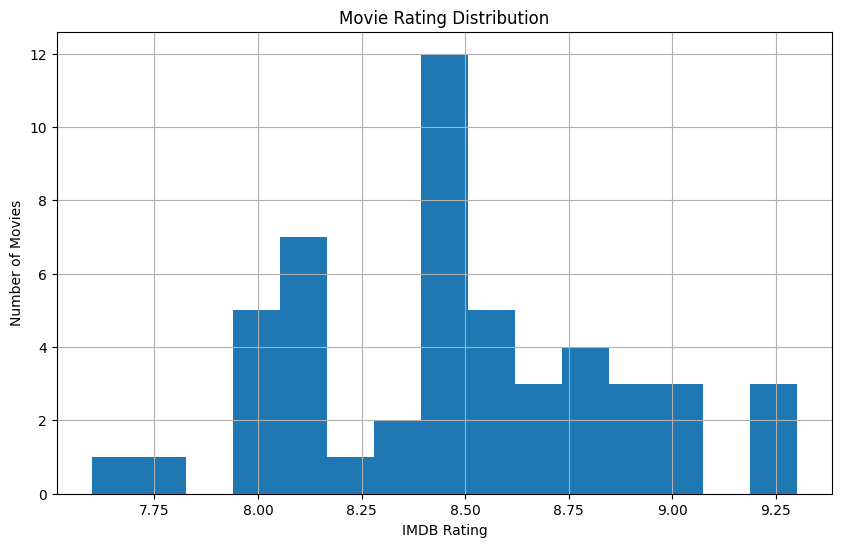

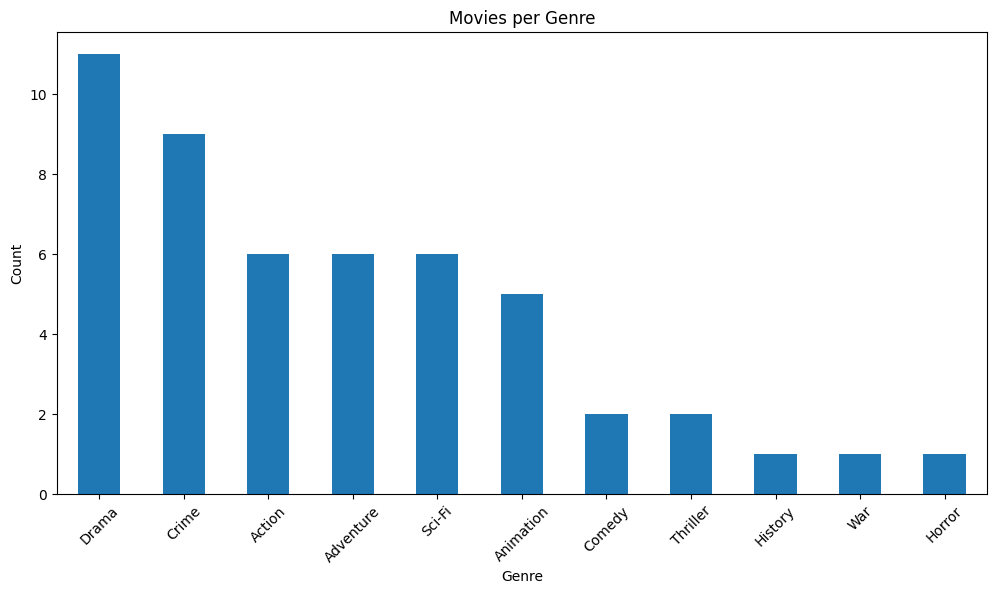


=== Movie Recommendation System ===
1. Browse Movies with Filters
2. Search Movies
3. Rate a Movie
4. Get Recommendations
5. Show Top Movies
6. View Statistics
7. Analyze Review Sentiment
8. Exit
Enter your choice (1-8): 7


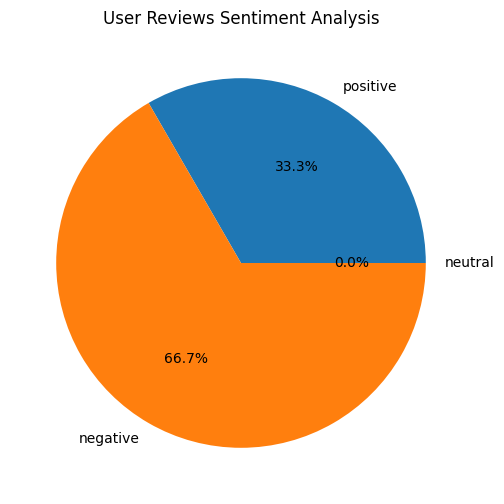


=== Movie Recommendation System ===
1. Browse Movies with Filters
2. Search Movies
3. Rate a Movie
4. Get Recommendations
5. Show Top Movies
6. View Statistics
7. Analyze Review Sentiment
8. Exit
Enter your choice (1-8): 8
Goodbye!


In [101]:
def main_menu():
    while True:
        print("\n=== Movie Recommendation System ===")
        print("1. Browse Movies with Filters")
        print("2. Search Movies")
        print("3. Rate a Movie")
        print("4. Get Recommendations")
        print("5. Show Top Movies")
        print("6. View Statistics")
        print("7. Analyze Review Sentiment")
        print("8. Exit")

        choice = input("Enter your choice (1-8): ")

        if choice == '1':
            filter_menu()
        elif choice == '2':
            search_menu()
        elif choice == '3':
            rate_menu()
        elif choice == '4':
            recommendation_menu()
        elif choice == '5':
            top_movies_menu()
        elif choice == '6':
            stats_menu()
        elif choice == '7':
            analyze_sentiment()
        elif choice == '8':
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

def filter_menu():
    print("\n--- Filter Movies ---")
    genre = input("Enter genre (leave blank for any): ").strip()
    year = input("Enter release year (leave blank for any): ").strip()
    director = input("Enter director name (leave blank for any): ").strip()

    year = int(year) if year.isdigit() else None
    results = filter_movies(
        genre=genre or None,
        year=year,
        director=director or None
    )
    print(f"\nFound {len(results)} movies:")
    display(results[['Title', 'Genre', 'Release Year', 'Rating', 'Director']])

def search_menu():
    print("\n--- Search Movies ---")
    title = input("Enter title (leave blank to skip): ").strip()
    keyword = input("OR enter genre keyword (leave blank to skip): ").strip()

    if title or keyword:
        results = search_movies(title=title, keyword=keyword)
        print(f"\nFound {len(results)} movies:")
        display(results[['Title', 'Genre', 'Release Year', 'Rating']])
    else:
        print("Please enter at least one search criteria")

def rate_menu():
    print("\n--- Rate a Movie ---")
    display(movies_df[['Movie ID', 'Title']])

    try:
        movie_id = int(input("Enter Movie ID: "))
        rating = float(input("Enter rating (0-5): "))
        review = input("Enter review (optional): ").strip()

        if 0 <= rating <= 5:
            rate_movie(movie_id, rating, review or None)
            print("Rating submitted successfully!")
        else:
            print("Rating must be between 0 and 5")
    except ValueError:
        print("Invalid input format")

def recommendation_menu():
    print("\n--- Recommendations ---")
    print("1. Personalized Recommendations")
    print("2. Director Suggestions")
    print("3. Genre Suggestions")
    sub_choice = input("Enter choice (1-3): ")

    if sub_choice == '1':
        recs = get_personalized_recommendations()
        if not recs.empty:
            print("\nRecommended for you:")
            display(recs[['Title', 'Genre', 'Rating']])
        else:
            print("No recommendations available. Rate some movies first!")
    elif sub_choice in ['2', '3']:
        director = input("Enter director name: ").strip() if sub_choice == '2' else None
        genre = input("Enter genre: ").strip() if sub_choice == '3' else None
        suggestions = suggest_movies(genre=genre, director=director)
        if not suggestions.empty:
            print("\nSuggested movies:")
            display(suggestions[['Title', 'Genre', 'Rating']])
        else:
            print("No movies found matching criteria")

def top_movies_menu():
    print("\n--- Top Movies ---")
    print("1. Top 10 Overall")
    print("2. Top by Genre")
    print("3. Top by Year")
    sub_choice = input("Enter choice (1-3): ")

    if sub_choice == '1':
        top = generate_top10()
    elif sub_choice == '2':
        genre = input("Enter genre: ").strip()
        top = generate_top10('genre', genre)
    elif sub_choice == '3':
        year = input("Enter year: ").strip()
        top = generate_top10('year', int(year)) if year.isdigit() else pd.DataFrame()
    else:
        print("Invalid choice")
        return

    if not top.empty:
        print("\nTop Movies:")
        display(top[['Title', 'Genre', 'Release Year', 'Rating']])
    else:
        print("No movies found")

def stats_menu():
    print("\n--- Statistics ---")
    plot_rating_distribution()
    plot_genre_counts()

# Start the interface
if __name__ == "__main__":
    main_menu()